In [1]:
### Computation

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
import time
from sklearn import datasets


In [2]:
data = datasets.load_digits()
X = data.data
y = data.target

In [3]:
sobol_x = np.asmatrix([[-1, 0, 1],
           [-2, 0, 2], 
           [-1, 0, 1]])

sobol_y = np.asmatrix([[1, 2, 1], 
           [0, 0, 0], 
           [-1,-2,-1]])

def sobolop(px_nb):
    
    x_p=np.sum(np.diag(np.dot(px_nb, sobol_x.T)))
    y_p=np.sum(np.diag(np.dot(px_nb, sobol_y.T)))
    
    val = np.ceil(np.sqrt(x_p**2 + y_p**2))
    
    return val

In [4]:
height = data.images[0].shape[0]
width = data.images[0].shape[1]

res = np.zeros((height - 2, width - 2))

for i in range(1, height-1):
    for j in range(1, width-1):
        res[i-1, j-1] = sobolop(np.asmatrix(data.images[0][i-1:i+2,j-1:j+2]))

0


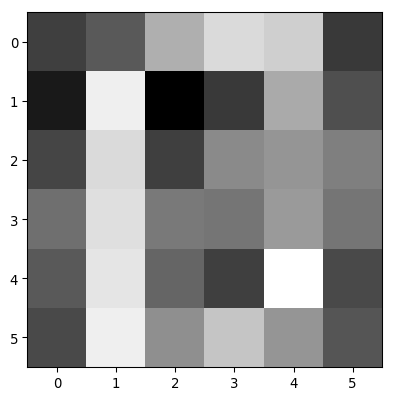

In [5]:
plt.imshow(res, cmap=plt.cm.gray_r)
print(data.target[0])